In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Replacing Blanks with 0 as Tenure is 0 and no total Charges are Recorded

In [7]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isnull().sum().sum()

np.int64(0)

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df["customerID"].duplicated().sum()

np.int64(0)

In [13]:
def conv(value):
   if value == 1:
      return "yes"
   else:
      return "no"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

#Converted 0 and 1 values of senior citizen to yes/no to make it easier to understand


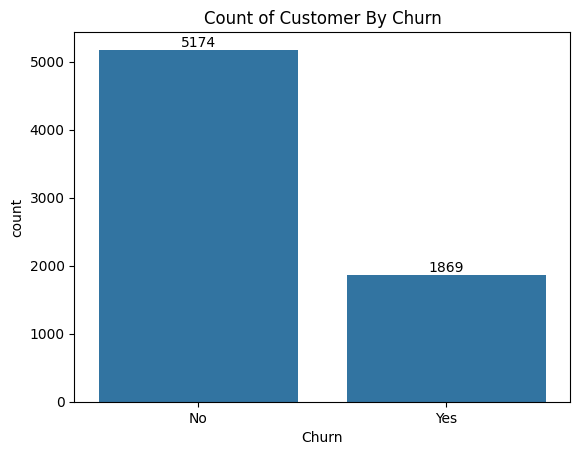

In [14]:
ax = sns.countplot(x = 'Churn' , data = df)
plt.title("Count of Customer By Churn")
ax.bar_label(ax.containers[0])
plt.show()

In [15]:
gb = df.groupby("Churn").agg({'Churn': "count"})
gb
#plt.pie(df['Churn'])
#plt.show()

,Churn
Churn,
No,5174
Yes,1869


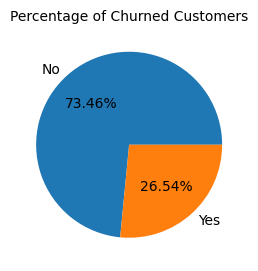

In [16]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn': "count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize = 10)
plt.show()

from the given pie chart we can conclude that 26.54% of our customers have churned out
not let's explore the reason behind it

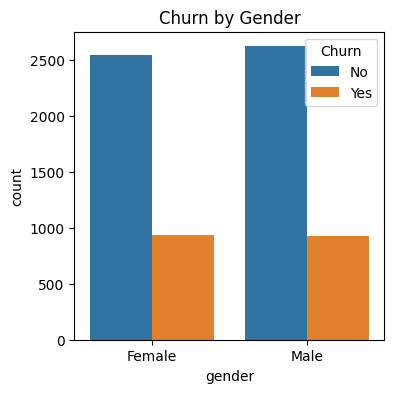

In [17]:
plt.figure(figsize = (4,4))
sns.countplot(x = "gender", data = df , hue = "Churn")
plt.title("Churn by Gender")
plt.show()

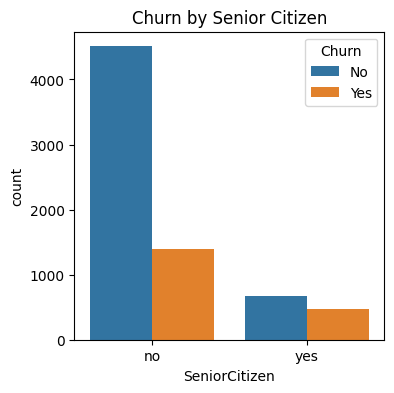

In [18]:
plt.figure(figsize = (4,4))
sns.countplot(x = "SeniorCitizen", data = df , hue = "Churn")
plt.title("Churn by Senior Citizen")
plt.show()

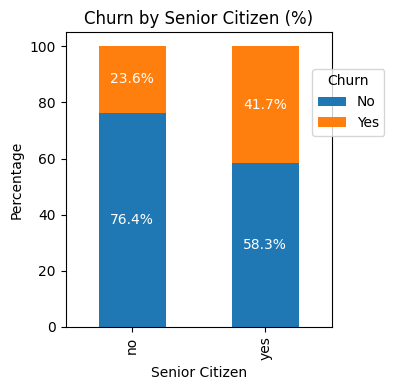

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a crosstab to count combinations
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100

# Plot stacked bar chart
ct.plot(kind='bar', stacked=True, figsize=(4,4), color=['#1f77b4','#ff7f0e'])

# Add percentage labels on each segment
for i, (index, row) in enumerate(ct.iterrows()):
    bottom = 0
    for churn_type, value in row.items():
        plt.text(i, bottom + value/2, f'{value:.1f}%', ha='center', va='center', color='white', fontsize=10)
        bottom += value

# Titles and labels
plt.title("Churn by Senior Citizen (%)")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")
plt.legend(title="Churn", bbox_to_anchor=(0.9,0.9))  #Customize legend Location
plt.tight_layout()
plt.show()


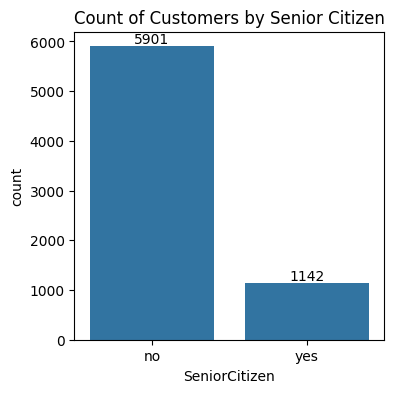

In [20]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

comparative a greater percentage of people in senior citizen category have churned

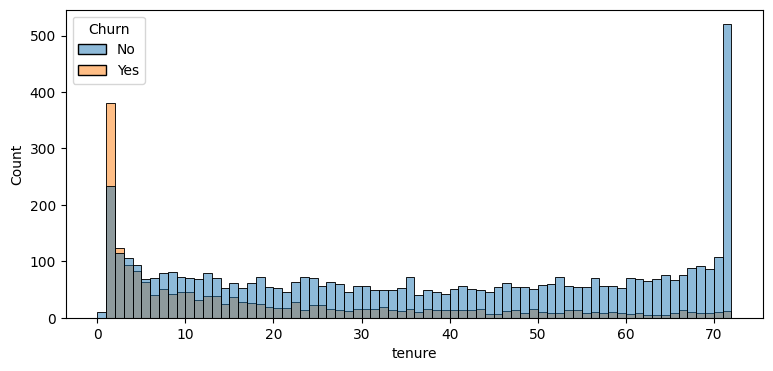

In [21]:
plt.figure(figsize = (9,4))
sns.histplot(x = 'tenure' , data = df, bins = 72, hue = "Churn")
plt.show()


People who have used our services for a long time have stayed and people who haave used our sevices 1 or 2 months have churned

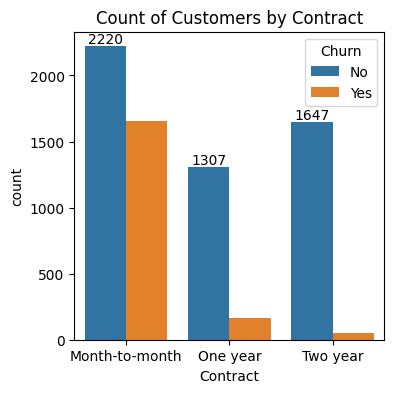

In [22]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df, hue = 'Churn' )
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show ()

People Who have month to month contract are likely to churn then from those who have 1 or 2 years or contract

In [23]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

/tmp/ipython-input-2167368203.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")
/tmp/ipython-input-2167368203.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")
/tmp/ipython-input-2167368203.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")
/tmp/ipython-input-2167368203.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `leg

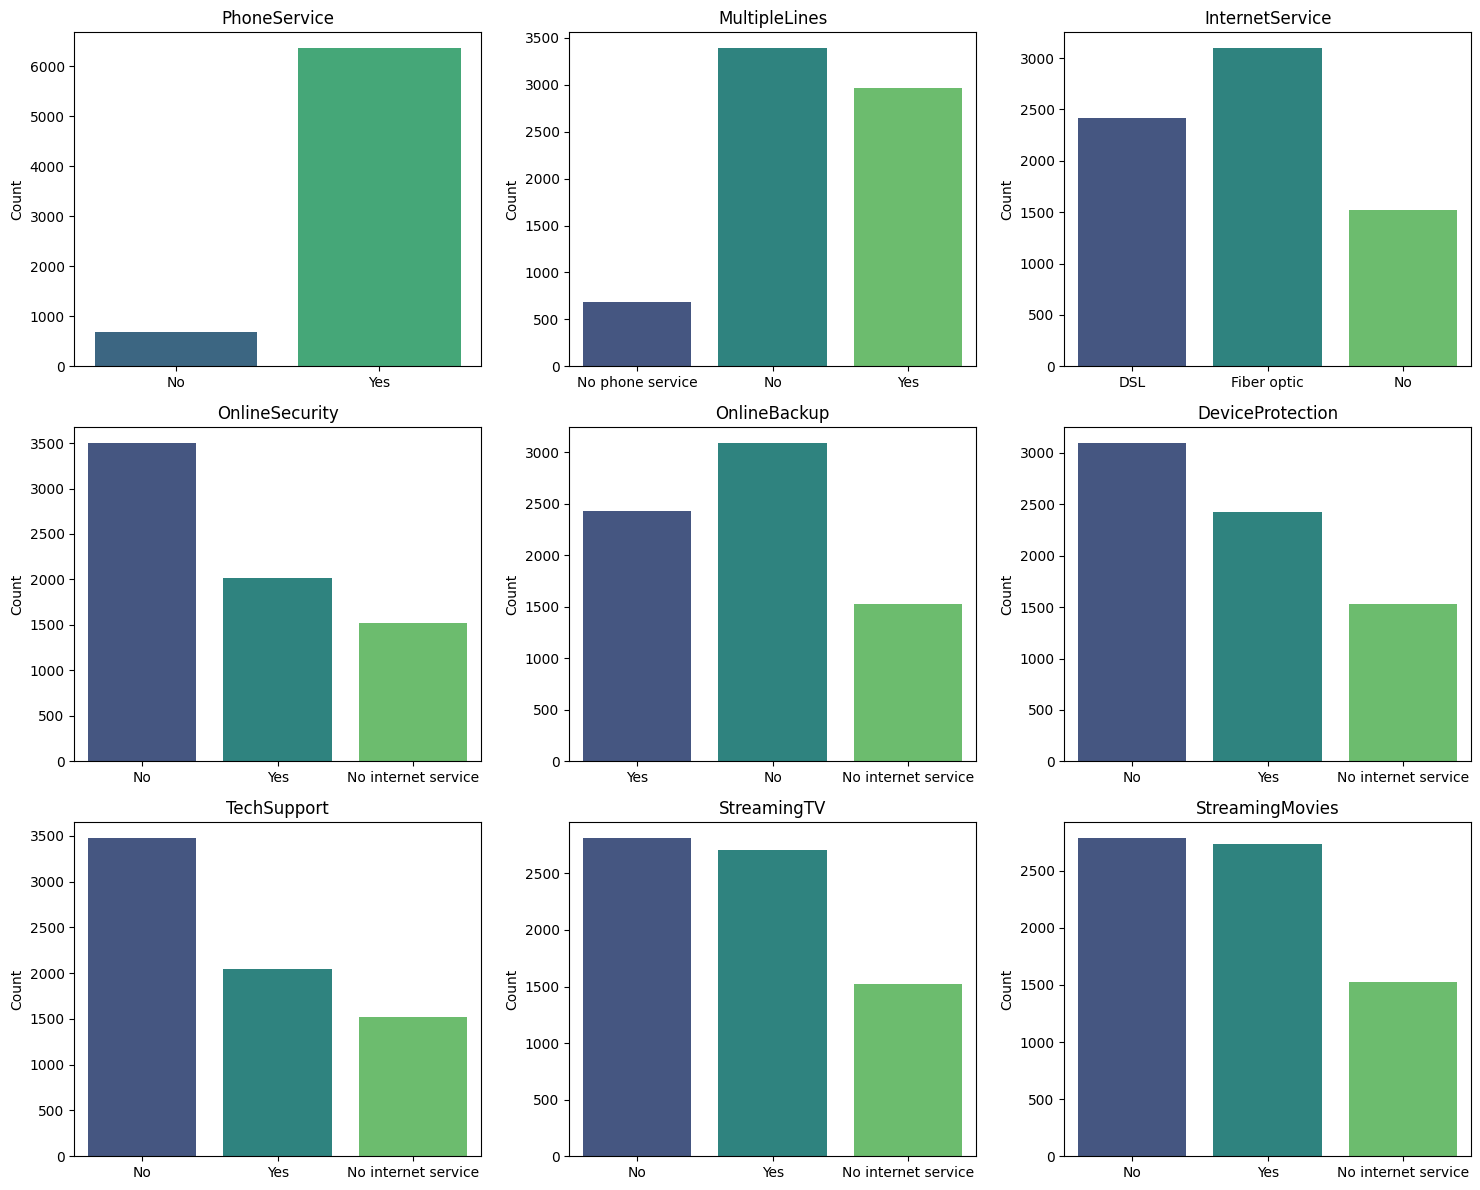

In [24]:

# List of columns you mentioned
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Define subplot grid
plt.figure(figsize=(15, 12))
for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)  # 3 rows, 3 columns
    sns.countplot(x=col, data=df, palette="viridis")
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


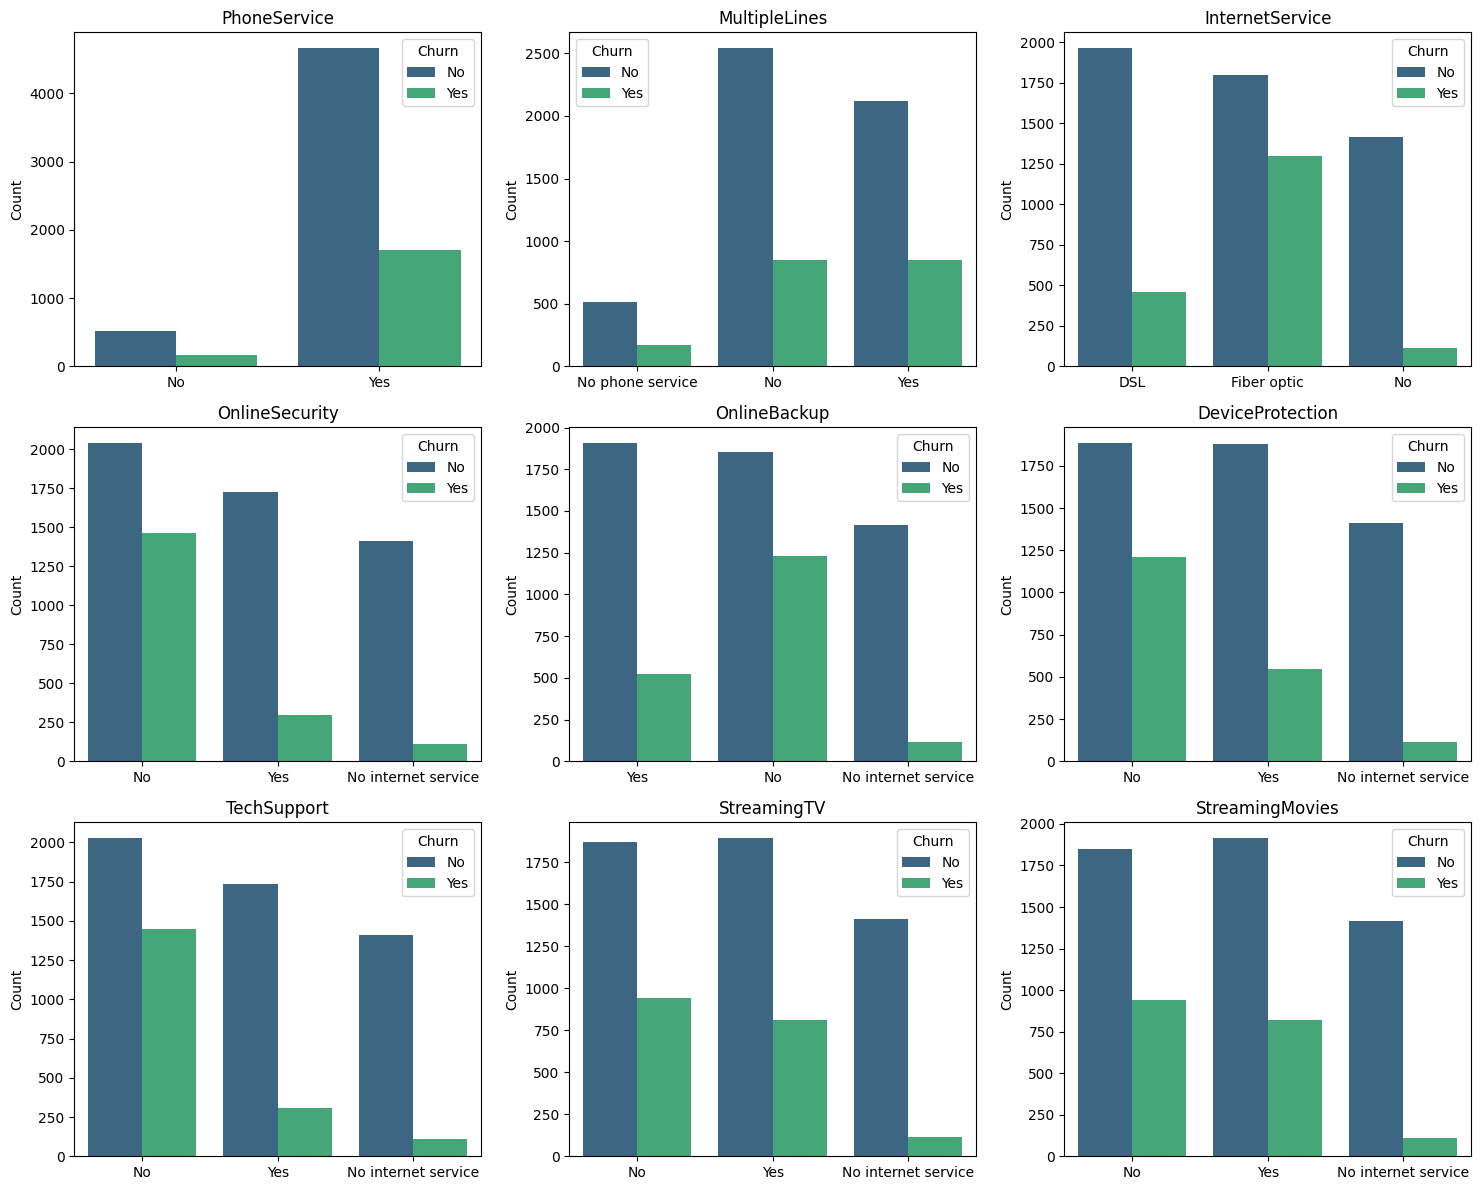

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns you mentioned
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Define subplot grid
plt.figure(figsize=(15, 12))
for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)  # 3 rows, 3 columns
    sns.countplot(x=col, data=df, palette="viridis", hue= "Churn")
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


The majority of Customers who do not churn tend to have servicess like  PhoneServices, InternetService (particularly DSL), and OnlineSecurity enabled.For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.

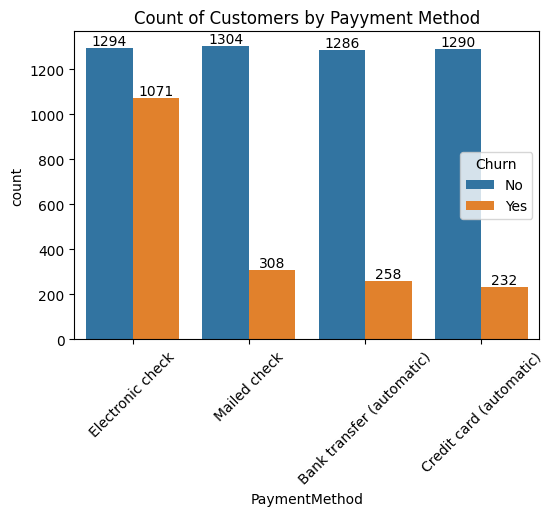

In [32]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod" , data = df , hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers by Payyment Method")
plt.xticks(rotation = 45)
plt.show()

Customer is likely to churn when he is using electronic check as a payment method.